In [213]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [214]:
# load data
df = pd.read_csv(open('penguins.csv', 'rb'))
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [215]:
# Get descriptive statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [216]:
# Investigate data
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [217]:
# Clean data

# According the data set min value of flipper_length_mm is -132 and is is a little bit strange
# and max value of flipper_length_mm is 5000 mm (5 metres) while mean value is 214
df = df[(df['flipper_length_mm'] >= 0) & (df['flipper_length_mm'] <= 1000)]

# Get rid of 'sex' as a object and conver it into categorical feature
gender_mapping = {'FEMALE' : 0, 'MALE' : 1}
df['sex'] = df['sex'].map(gender_mapping)

df = df.dropna()
df = df.drop_duplicates()

# And normalize it
scaler = StandardScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(data = X, columns = df.columns)

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,-1.391123e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,9.939939e-01


array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

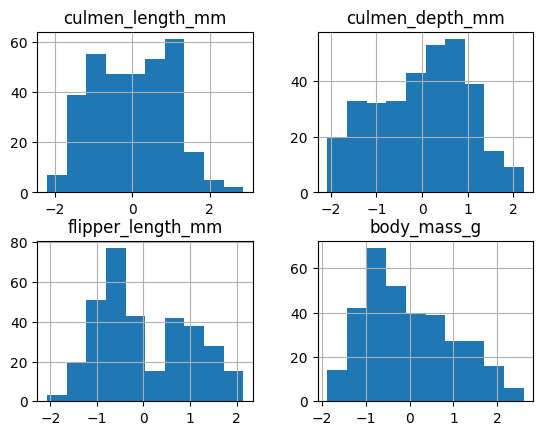

In [218]:
# Now data is clean

# Visialize it
df.drop('sex', axis = 1).hist()

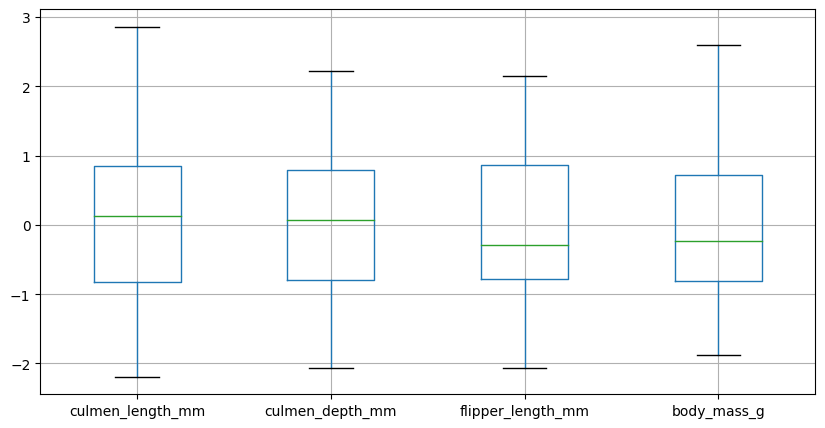

In [219]:
# Get boxplots
plt.figure(figsize = (10, 5))
df.drop('sex', axis = 1).boxplot()
plt.show()

In [220]:
# Try PCA to squeeze feature space
from sklearn.decomposition import PCA

pca = PCA()
penguins_PCA = pca.fit_transform(df)

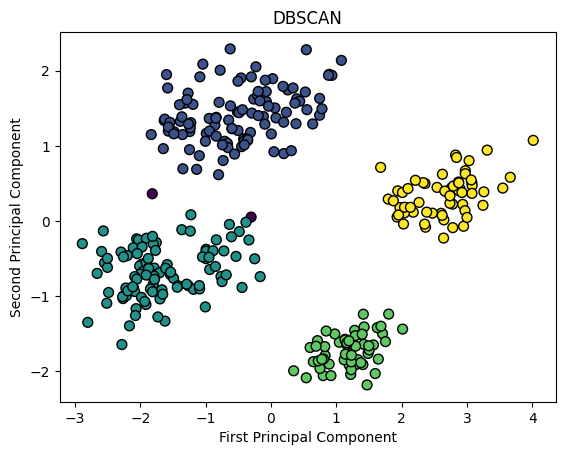

In [221]:
# Try DBSCAN
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 1, min_samples = 5)
clustering.fit(penguins_PCA)

labels = clustering.labels_

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c = labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title('DBSCAN')
plt.show()

In [222]:
# Get metrics
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, calinski_harabasz_score

silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_PCA[:, 0], labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.49167917798215593

Homogeneity: 0.23694183294557697
Completeness: 0.9999999999999997
V-measure: 0.3831090947604841

Calinski-Harabasz Index: 278.76616775319724


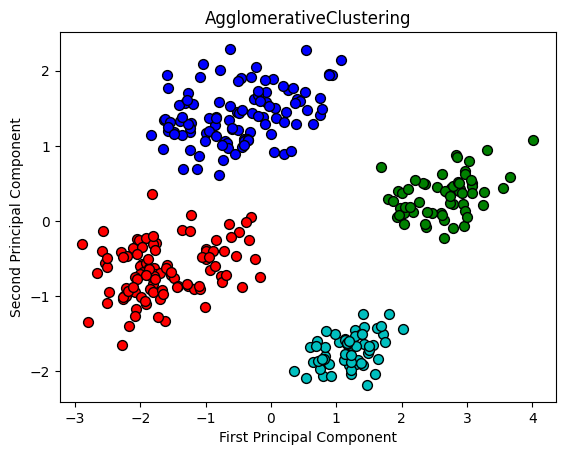

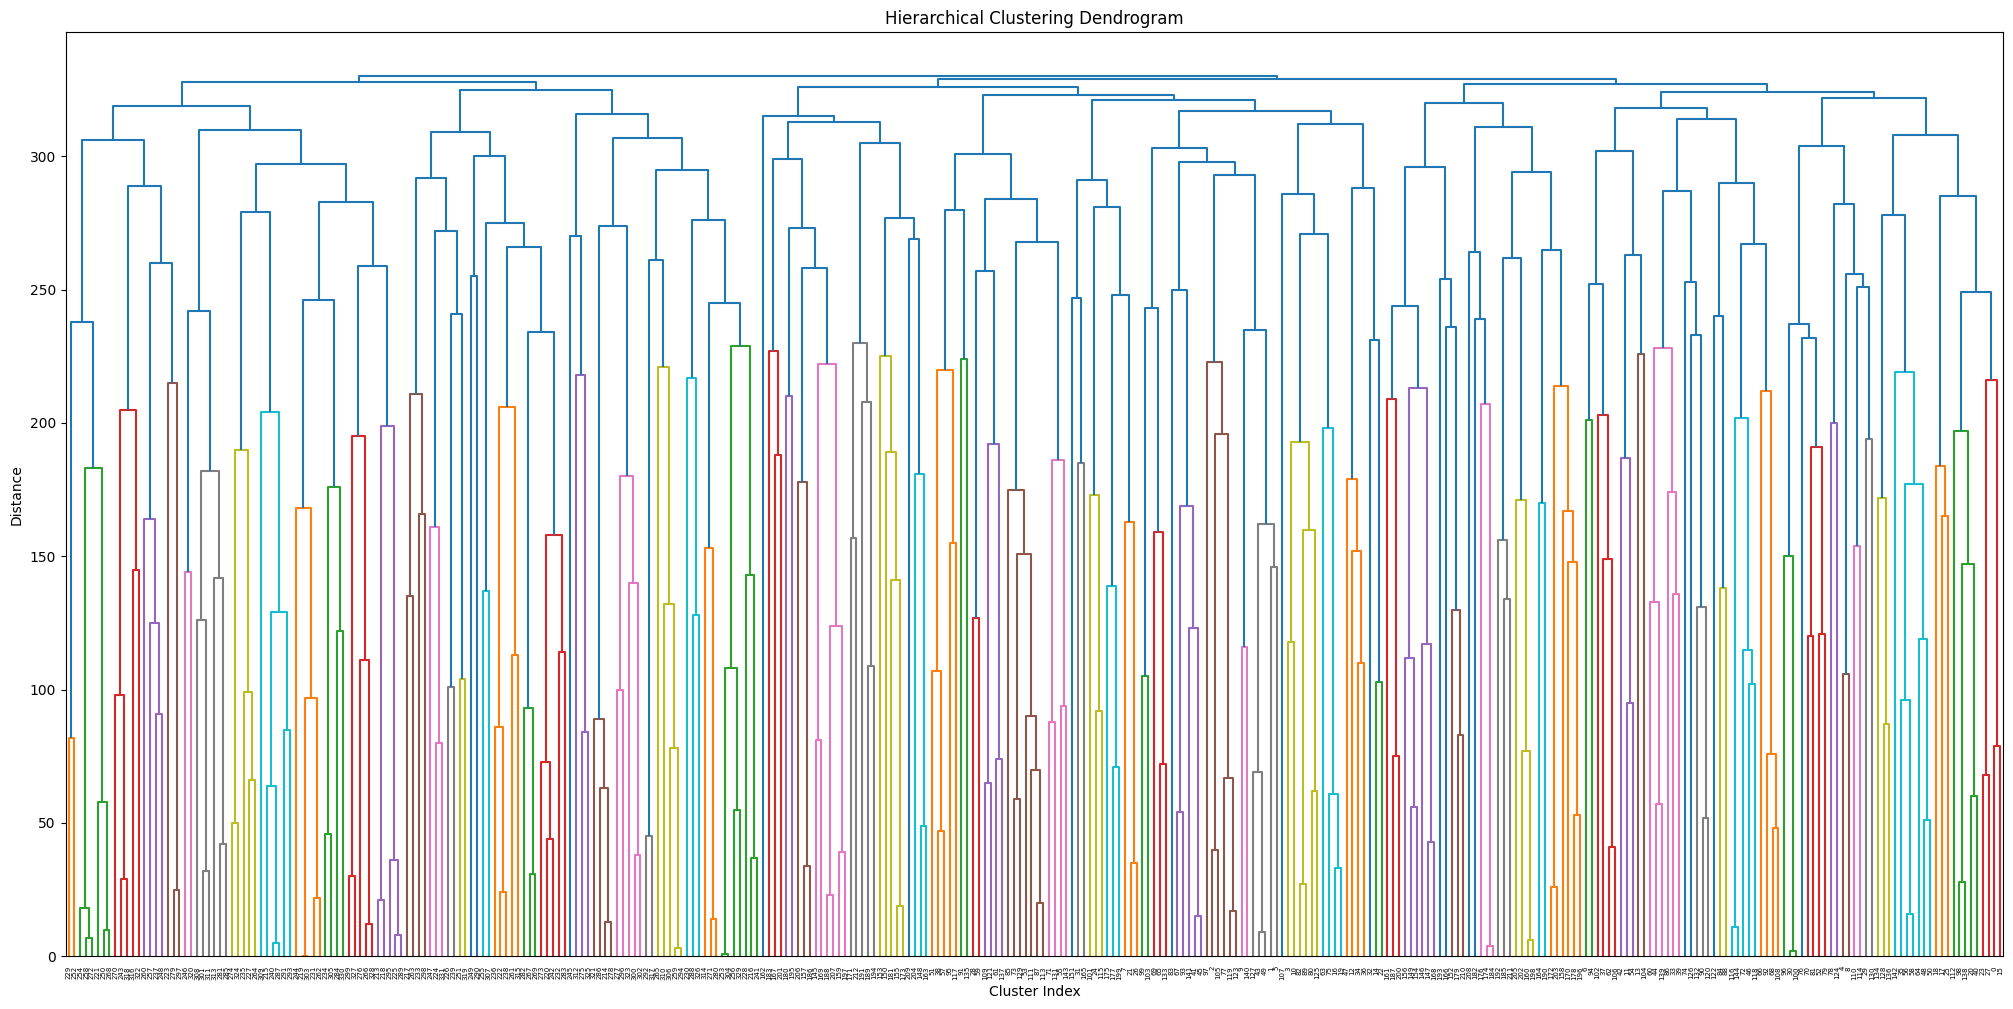

In [223]:
# DBSCAN find 4 clusters and 2 outlier

from sklearn.cluster import AgglomerativeClustering
from itertools import cycle
from scipy.cluster.hierarchy import dendrogram

clusters_num = 4

clustering = AgglomerativeClustering(n_clusters = clusters_num, linkage = "ward", affinity = 'euclidean')

x_pr = clustering.fit_predict(penguins_PCA)

for c, n in zip(cycle('bgrc'), range(clusters_num)):
    clst = np.array(penguins_PCA[x_pr == n]).T
    plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)

plt.title('AgglomerativeClustering')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

# Get dendrogram
plt.figure(figsize = (25, 12))

# Children of hierarchical clustering
children = clustering.children_

# Distances between each pair of children
distance = np.arange(children.shape[0])

# The number of observations contained in each cluster level
no_of_observations = np.arange(2, children.shape[0] + 2)

# Create linkage matrix and then plot the dendrogram
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# Plot the corresponding dendrogram
dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')

plt.show()

In [224]:
# Get metrics
silhouette_avg = silhouette_score(df, x_pr)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_PCA[:, 0], x_pr)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, x_pr)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5085922485155359

Homogeneity: 0.23178408409867132
Completeness: 0.9999999999999997
V-measure: 0.3763388195882946

Calinski-Harabasz Index: 363.96580744358613
